In [5]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
x = np.array([
    0, 0.101010101, 0.202020202, 0.303030303, 0.404040404, 0.505050505,
    0.606060606, 0.707070707, 0.808080808, 0.909090909, 1.01010101,
    1.111111111, 1.212121212, 1.313131313, 1.414141414, 1.515151515,
    1.616161616, 1.717171717, 1.818181818, 1.919191919, 2.02020202,
    2.121212121, 2.222222222, 2.323232323, 2.424242424, 2.525252525,
    2.626262626, 2.727272727, 2.828282828, 2.929292929, 3.03030303,
    3.131313131, 3.232323232, 3.333333333, 3.434343434, 3.535353535,
    3.636363636, 3.737373737, 3.838383838, 3.939393939, 4.04040404,
    4.141414141, 4.242424242, 4.343434343, 4.444444444, 4.545454545,
    4.646464646, 4.747474747, 4.848484848, 4.949494949, 5.050505051,
    5.151515152, 5.252525253, 5.353535354, 5.454545455, 5.555555556,
    5.656565657, 5.757575758, 5.858585859, 5.95959596, 6.060606061,
    6.161616162, 6.262626263, 6.363636364, 6.464646465, 6.565656566,
    6.666666667, 6.767676768, 6.868686869, 6.96969697, 7.070707071,
    7.171717172, 7.272727273, 7.373737374, 7.474747475, 7.575757576,
    7.676767677, 7.777777778, 7.878787879, 7.97979798, 8.080808081,
    8.181818182, 8.282828283, 8.383838384, 8.484848485, 8.585858586,
    8.686868687, 8.787878788, 8.888888889, 8.98989899, 9.090909091,
    9.191919192, 9.292929293, 9.393939394, 9.494949495, 9.595959596,
    9.696969697, 9.797979798, 9.898989899, 10
])
y = np.array([
    -0.751642923, -0.926640428, -0.319924338, 0.376892723, -0.231023505,
    0.014091808, 1.105451571, 0.796475129, 0.171547022, 0.56635857,
    -0.139225663, -0.408109646, -0.351660946, -1.716761572, -1.86211045,
    -1.44131145, -1.728306253, -1.021781364, -1.493635579, -1.53125022,
    0.167349331, -0.408062488, -0.013814792, -0.562443597, 0.007621429,
    0.39195491, -0.249016641, 0.454341486, -0.120357293, -0.053336486,
    -0.273671428, 0.926376796, 0.011470012, -0.452086244, 0.572692941,
    -0.360222105, 0.422062051, -0.640386561, -0.366851962, 0.280641082,
    0.366647584, -0.15624858, -0.568014294, -0.925372598, -1.740444447,
    -1.517765853, -1.451879164, -0.65258136, -0.867747882, -1.695424646,
    -0.371212195, -0.427174684, -0.296238702, 0.566405189, 0.907414431,
    0.885721621, -0.076222962, 0.020071637, 0.104846842, 0.158501309,
    -0.833278892, -0.911919595, -1.530824256, -1.650599097, -0.633319998,
    -0.269528717, -0.832059825, -0.109284809, -0.24024251, -0.574338233,
    0.058792644, 0.728813061, -0.022279314, 0.780492569, -1.322301506,
    0.398565739, 0.064563154, -0.044482725, 0.293438384, -0.548377692,
    0.574095746, 1.117496082, 1.919177399, 1.117170901, 1.095244789,
    1.27975134, 1.920279197, 1.466288804, 0.803651378, 1.049796671,
    0.561691123, 0.751459142, -0.26159543, -0.15884377, -0.170350993,
    -0.583100098, 0.504603999, 0.750763913, 0.905643517, 1.048997491
])
num_folds = 10
#Initialize cross-validation method
kf = KFold(n_splits=num_folds)

#Initialize lists to store MSE scores
mse_scores = []

#Perform cross-validation
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    #Initialize linear regression model
    model = LinearRegression()
    
    #Train the model
    model.fit(x_train.reshape(-1, 1), y_train)
    
    #Make predictions
    y_pred = model.predict(x_test.reshape(-1, 1))
    
    #Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    
    #Store MSE score
    mse_scores.append(mse)

#Calculate average MSE
avg_mse = np.mean(mse_scores)
print(mse_scores)
print("Average MSE:", avg_mse)


[1.3917990322074933, 1.1947211542429828, 0.2604280500632773, 0.35138413291761367, 1.1829042812345256, 0.2563371361552439, 1.0990338829515354, 0.3809168733718541, 1.7719751923029647, 0.2899232827198439]
Average MSE: 0.8179423018167334


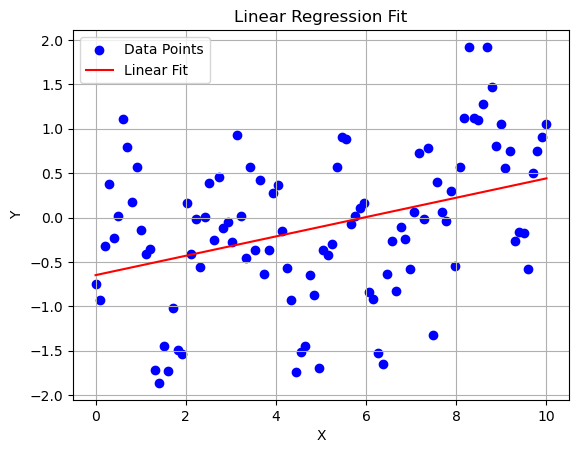

In [7]:
import matplotlib.pyplot as plt

#Initialize linear regression model
final_model = LinearRegression()

#Train the final model using all data
final_model.fit(x.reshape(-1, 1), y)

#Predict y values using the final model
y_pred_final = final_model.predict(x.reshape(-1, 1))

#Plot the data points
plt.scatter(x, y,color="blue",label='Data Points')

#Plot the regression line
plt.plot(x, y_pred_final, color='red', label='Linear Fit')

plt.title('Linear Regression Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


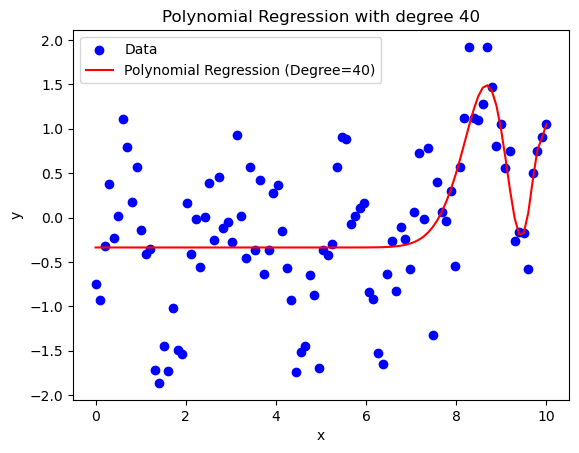

Mean Squared Error (MSE) - Training: 0.4478
Mean Squared Error (MSE) - Testing: 0.6801


In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

def polynomial_regression_with_cv(x, y, degree, num_folds=10):
    kf = KFold(n_splits=num_folds, shuffle=True)
    mse_scores = []
    train_mse_scores = []

    for train_index, test_index in kf.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        #Reshape x to 2D array
        x_train_reshaped = x_train.reshape(-1, 1)
        x_test_reshaped = x_test.reshape(-1, 1)

        #Polynomial features
        poly_features = PolynomialFeatures(degree=degree)
        x_train_poly = poly_features.fit_transform(x_train_reshaped)
        x_test_poly = poly_features.transform(x_test_reshaped)

        #Fit linear regression model
        model = LinearRegression()
        model.fit(x_train_poly, y_train)

        #Predictions
        y_pred = model.predict(x_test_poly)

        #Calculate MSE for testing
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)

        #Calculate MSE for training
        y_train_pred = model.predict(x_train_poly)
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_mse_scores.append(train_mse)

    avg_mse = np.mean(mse_scores)
    avg_train_mse = np.mean(train_mse_scores)

    #Plot the results
    plt.scatter(x, y, color='blue', label='Data')
    x_fit = np.linspace(min(x), max(x), 100).reshape(-1, 1)
    x_fit_poly = poly_features.transform(x_fit)
    y_fit = model.predict(x_fit_poly)
    plt.plot(x_fit, y_fit, color='red', label=f'Polynomial Regression (Degree={degree})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Polynomial Regression with degree {degree}')
    plt.legend()
    plt.show()

    return avg_train_mse, avg_mse


degree_example = 40
avg_train_mse, avg_mse = polynomial_regression_with_cv(x, y, degree_example)
print("Mean Squared Error (MSE) - Training: {:.4f}".format(avg_train_mse))
print("Mean Squared Error (MSE) - Testing: {:.4f}".format(avg_mse))


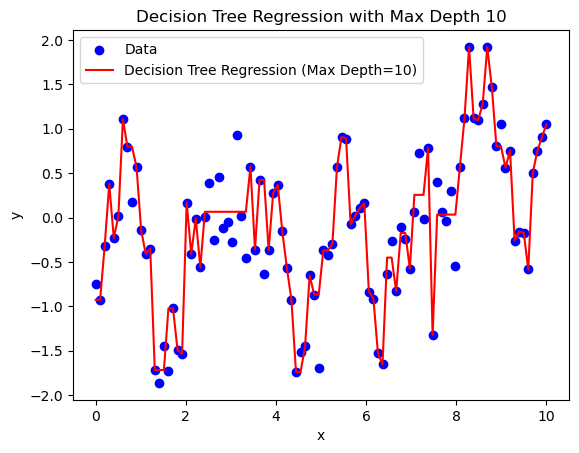

Mean Squared Error (MSE) - Training: 0.0102
Mean Squared Error (MSE) - Testing: 0.4418


In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

def decision_tree_regression_with_cv(x, y, max_depth, num_folds=10):
    kf = KFold(n_splits=num_folds, shuffle=True)
    mse_scores = []
    train_mse_scores = []

    for train_index, test_index in kf.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Reshape x to 2D array
        x_train_reshaped = x_train.reshape(-1, 1)
        x_test_reshaped = x_test.reshape(-1, 1)

        # Fit decision tree regressor
        model = DecisionTreeRegressor(max_depth=max_depth)
        model.fit(x_train_reshaped, y_train)

        # Predictions
        y_pred = model.predict(x_test_reshaped)

        # Calculate MSE for testing
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)

        # Calculate MSE for training
        y_train_pred = model.predict(x_train_reshaped)
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_mse_scores.append(train_mse)

    avg_mse = np.mean(mse_scores)
    avg_train_mse = np.mean(train_mse_scores)

    # Plot the results
    plt.scatter(x, y, color='blue', label='Data')
    x_fit = np.linspace(min(x), max(x), 100).reshape(-1, 1)
    y_fit = model.predict(x_fit)
    plt.plot(x_fit, y_fit, color='red', label=f'Decision Tree Regression (Max Depth={max_depth})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Decision Tree Regression with Max Depth {max_depth}')
    plt.legend()
    plt.show()

    return avg_train_mse, avg_mse


max_depth_example = 10
avg_train_mse, avg_mse = decision_tree_regression_with_cv(x, y, max_depth_example)
print("Mean Squared Error (MSE) - Training: {:.4f}".format(avg_train_mse))
print("Mean Squared Error (MSE) - Testing: {:.4f}".format(avg_mse))


**本来想试试EM算法，但是发现效果不太好**

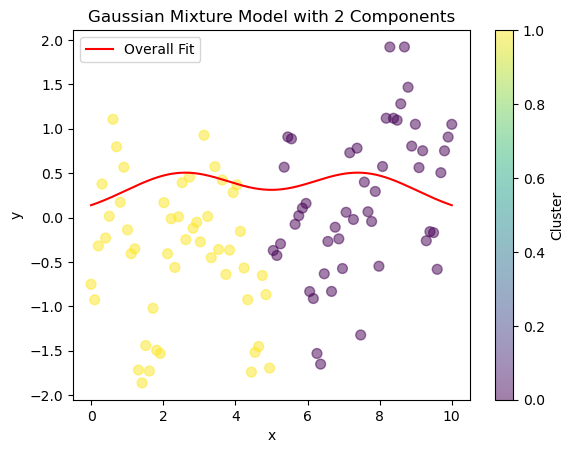

Mean Squared Error (MSE) with 2 components: 1.6325


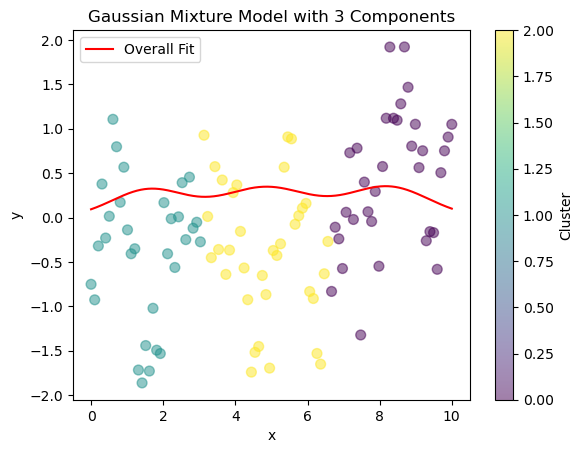

Mean Squared Error (MSE) with 3 components: 3.1931


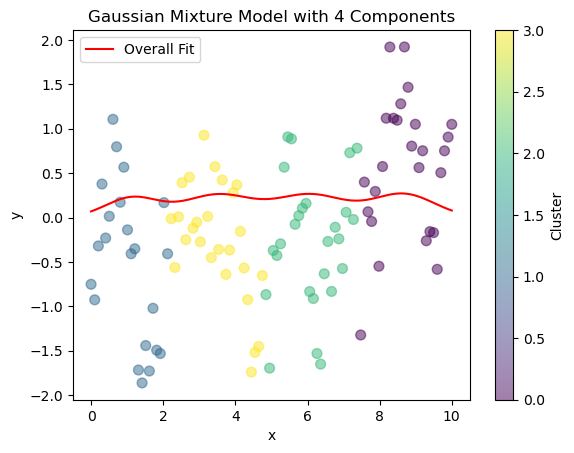

Mean Squared Error (MSE) with 4 components: 5.2333


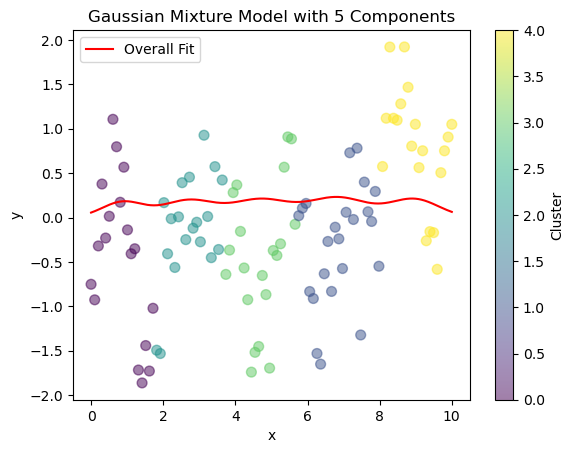

Mean Squared Error (MSE) with 5 components: 6.2254


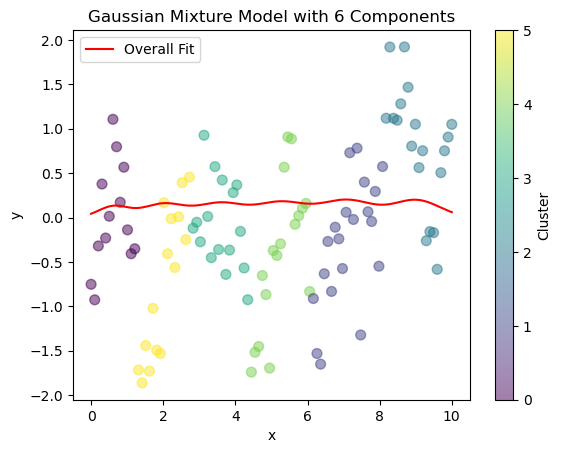

Mean Squared Error (MSE) with 6 components: 10.8701


In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import mean_squared_error

def fit_gaussian_mixture_model(x, y, n_components):
    # Reshape the data
    x_reshaped = x.reshape(-1, 1)

    #Initialize and fit Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(x_reshaped)

    #Predictions
    y_pred = gmm.predict(x_reshaped)

    #Plot the results
    plt.scatter(x, y, c=y_pred, cmap='viridis', s=50, alpha=0.5)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Gaussian Mixture Model with {n_components} Components')
    plt.colorbar(label='Cluster')

    #Plot the overall Gaussian mixture model fit
    x_plot = np.linspace(min(x), max(x), 1000).reshape(-1, 1)
    pdf = np.zeros_like(x_plot)
    for i in range(n_components):
        pdf += gmm.weights_[i] * np.exp(-((x_plot - gmm.means_[i]) ** 2) / (2 * gmm.covariances_[i]))
    plt.plot(x_plot, pdf, '-', color='red', label='Overall Fit')

    plt.legend()
    plt.show()

    return gmm

def evaluate_gaussian_mixture_model(gmm, x, y):
    #Reshape the data
    x_reshaped = x.reshape(-1, 1)

    #Predictions
    y_pred = gmm.predict(x_reshaped)

    #Calculate MSE
    mse = mean_squared_error(y, y_pred)

    return mse

#Try different numbers of components
n_components_list = [2,3,4,5,6]

#Initialize lists to store results
mse_scores = []

#Fit GMM and evaluate for each number of components
for n_components in n_components_list:
    gmm = fit_gaussian_mixture_model(x, y, n_components)
    mse = evaluate_gaussian_mixture_model(gmm, x, y)
    mse_scores.append(mse)
    print(f"Mean Squared Error (MSE) with {n_components} components: {mse:.4f}")
